# 변수 형식 처리 및 파생변수 생성

### 주요 내용

1. 변수 수정, 추가 및 제거
2. 형식 변환 및 파생변수 생성
<br>

### 목표 
1. 분석 목적에 맞게 변수를 수정하고 파생 변수를 추가할 수 있다.
2. 날짜 등 변수 형식을 활용할 수 있다.

<br>
<hr>
<br>


## 1. 변수(열)의 수정, 추가, 제거

**pandas**의 기본 기능과 메서드를 활용하여 변수를 추가 하거나 수정, 업데이트하거나 제거 가능  
변수를 선택하듯 **=**을 활용해서 변수를 추가하거나 업데이트 가능

### 1.1. 변수 수정 및 추가

In [ ]:
# 라이브러리 불러오기
import pandas as pd


# 예제 만들기 : 딕셔너리를 활용한 DataFrame 생성
df_own = pd.DataFrame({'FIRST' : ['A', 'B', 'C', 'D'],
                       'SECOND': [7,6,5,8], 
                       'THIRD' : pd.date_range('2023-01-01', periods=4, freq='W-SAT')})
df_own

In [ ]:
# 변수 형식 확인
df_own.dtypes

In [ ]:
# 변수이름을 활용한 변수선택
df_own['SECOND']

In [ ]:
# =을 활용한 추가
df_own['FOURTH'] = 0
df_own

In [ ]:
# =을 활용한 업데이트
df_own['FOURTH'] = df_own['SECOND'] + 1
df_own

In [ ]:
# .assign()도 활용 가능
df_own.assign(FOURTH = df_own['SECOND'] + 1)

<br>

pandas의 *dt.weekday*를 활용하여 날짜시간 변수에서 날짜 요소를 추출
 * 참고: [dt.weekday](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.weekday.html)

In [ ]:
# pandas의 dt.weekday 활용
    ## ['THIRD'] 대신 .THIRD 활용가능
df_own['THIRD'].dt.weekday

In [ ]:
df_own['WEEKDAY'] = df_own['THIRD'].dt.weekday
df_own

<br>

### 1.2.  변수 제거

*drop()*은 **index**와 **columns**를 활용하여 관측치와 변수를 제거  
`axis=`옵션에 따라 `axis=0`이면 관측치를 제거하거 `axis=1`이면 변수를 제거  

`columns=`이라는 옵션을 명시해서 변수를 제거하는 것이 가장 명확하고 실수를 줄일 수 있음

In [ ]:
# drop()을 활용한 관측치/변수 제거
df_own.drop('FOURTH', axis=1)
    # axis = 0 : 관측치
    # axis = 1 : 변수

In [ ]:
# drop()을 활용한 관측치/변수 제거(columns 활용)
df_own.drop(columns=['FOURTH'])
  

In [ ]:
# drop( ) 실행 후 원본 데이터는 변함이 없음
df_own

In [ ]:
# 원본 데이터의 업데이트
df_own = df_own.drop(columns=['FOURTH'])
df_own

In [ ]:
# 리스트를 활용한 복수 인덱스 제거
df_own = df_own.drop([0,3], axis=0)
df_own

In [ ]:
df_own[2] = 0
df_own

In [ ]:
df_own.drop(2,axis=1)

<br>

### 1.3. 변수 이름 변경

변수이름을 바꾸고 싶을 때는 **DataFrame**의 메서드 *rename()*을 활용  
이때 `columns=` 옵션을 활용하고 딕셔너리 형식으로 기존변수이름과 새변수이름을 콜론으로 연결

In [ ]:
# rename() 활용 변수 이름 바꾸기 
df_own.rename(columns = {'FIRST':'var1', 'SECOND':'var2'})

<br>

#### [실습] df_sp를 활용

1. 'math score', 'reading score', 'writing score'를 합한 변수 'sum'을 **df_sp**에 추가
2. 'math score', 'reading score', 'writing score' 중 한과목이라도 40보다 작은지 확인하고 변수 'fail_yn' 추가
3. 2.의 'fail_yn'을 활용해서 세 점수 중 하나라도 40점 미만인 학생 선택
4. 변수 'sum'의 이름을 'total'로 변경
5. 변수 'fail_yn'을 **df_sp**에서 제거하고 원본 데이터 업데이트 

In [ ]:
df_sp = pd.read_csv('data/StudentsPerformance.csv')
df_sp.head()

In [ ]:
df_sp['sum'] = (df_sp['math score'] + df_sp['reading score'] + df_sp['writing score'])
df_sp

In [ ]:
# 2. 참고
cond_fail = (df_sp['math score']<40) | (df_sp['reading score']<40) | (df_sp['writing score']<40)
cond_fail

In [ ]:
df_sp['fail_yn'] = cond_fail
df_sp

In [ ]:
df_sp[df_sp['fail_yn']]

In [ ]:
df_sp.rename(columns={'sum':'total'})

In [ ]:
df_sp = df_sp.drop('fail_yn', axis=1)
df_sp

#### 참고
한번에 비교 연산을 하거나 DataFrame의 sum()을 활용 가능

In [ ]:
df_sp.select_dtypes('number') <= 40

In [ ]:
# 하나라도 True인 것 찾기
df_sp[ (df_sp.select_dtypes('number') < 40).any(axis=1) ]

In [ ]:
# 변수별로 40점 미만 학생수 계산하기
(df_sp.select_dtypes('number') <= 40).sum(axis=0)

In [ ]:
# 관측치별로 40점 미만 과목수 계산하기
(df_sp.select_dtypes('number') <= 40).sum(axis=1)

In [ ]:
(df_sp.select_dtypes('number') <= 40).sum(axis=1).value_counts()

In [ ]:
df_fail = pd.DataFrame({'numberOfFail':(df_sp.select_dtypes('number') <= 40).sum(axis=1) })
df_fail.groupby('numberOfFail').size()

<br>
<hr>
<br>

## 2. 변수 형식 변환 및 파생변수 생성

분석과정에서 변수의 형식을 바꾸거나 기존 변수를 활용한 파생변수 생성 가능  



### 2.1. 변수 형식의 확인/변환
**DataFrame**에서는 아래와 같은 형식의 Seires를 활용  


+ float: 실수(소수점을 포함한 숫자)
+ int: 정수(integer)
+ datetime: 날짜시간
+ bool: 불/불린(True 혹은 False)
+ category: 범주형
+ object: 문자형(string) 혹은 그 외

*.dtypes*를 활용하여 변수 형식을 확인  
*.astype()*을 활용해서 변수 형식을 변환 



In [ ]:
# 데이터 불러오기
df_ins = pd.read_csv('data/insurance.csv')
df_ins.head()

In [ ]:
# 변수 형식 확인
df_ins.dtypes

In [ ]:
# children을 float으로 변환
df_ins['children'].astype('float')

In [ ]:
# 기존 변수의 형식 업데이트
df_ins['children'] = df_ins['children'].astype('float')
df_ins.head()

In [ ]:
# 복수 변수의 형식 일괄 업데이트
category_vars = ['sex', 'smoker', 'region', 'children']
df_ins[category_vars] = df_ins[category_vars].astype('category')
df_ins.dtypes

In [ ]:
# select_dtypes()의 활용
df_ins.select_dtypes('category')

<br>

#### [실습] df_pr의 활용

1. Pulse2(뛴 후)와 Pulse1(뛰기 전)의 차이를 계산하고 'Diff'로 변수 추가하기
2. .dtypes로 형식 확인하고 .nunique()로 중복값 제거한 값 개수 확인하기
3. 범주형 형식이 적당한 변수 목록 만들기
4. 3.의 변수들을 astype()으로 category 형식으로 변환하고 업데이트 하기
5. Ran, Smokes, Alcohol별 1.의 Diff의 평균 계산하기

In [ ]:
df_pr = pd.read_csv('data/PulseRates.csv')
df_pr.head(5)

In [ ]:
df_pr['Diff'] = df_pr['Pulse2'] - df_pr['Pulse1']
df_pr

In [ ]:
df_pr.dtypes

In [ ]:
df_pr.nunique()

In [ ]:
nSeries = df_pr.nunique()
category_vars = (nSeries[nSeries < 4].index)

df_pr[category_vars] = df_pr[category_vars].astype('category')
df_pr.dtypes

In [ ]:
category_vars = ['Gender', 'Smokes', 'Alcohol', 'Exercise', 'Ran']
df_pr[category_vars] = df_pr[category_vars].astype('category')
df_pr.dtypes

In [ ]:
df_pr.groupby(['Ran', 'Smokes', 'Alcohol'], as_index=False)['Diff'].mean()

<br>

### 2.2. 수치형 변수의 구간화

수치형 변수는 *cut()* 이나 *qcut()* 으로 구간화 가능  


+ *cut()*: 등간격 혹은 주어진 구간 경계로 구간화
+ *qcut()*: 등비율로 구간화

<br>

*cut()*을 활용해서 등간격으로 구간화할 수 있고, `bins=` 옵션에 적절한 구간값을 직접 넣을 수도 있습니다. 

In [ ]:
# 등간격으로 구간화하기
pd.cut(df_ins['charges'], bins=10)

In [ ]:
charges_breaks = [0, 5000, 10000, 20000, 99999999999999]

In [ ]:
pd.cut(df_ins['charges'], bins=charges_breaks, right=False, labels=['4','3','2','1'])

In [ ]:
# cut()을 활용한 10등급화
df_ins['charges_grp'] = pd.cut(df_ins['charges'], bins=10, labels=range(10))
df_ins

In [ ]:
# 등구간의 관측치 불균형 문제
df_ins['charges_grp'].value_counts()

In [ ]:
sns.barplot(data=df_ins.groupby('charges_grp', as_index=False).size(), x='charges_grp', y='size' )

In [ ]:
# qcut()을 활용한 등비율 구간화
df_ins['charges_grp2'] = pd.qcut(df_ins['charges'], q=10, labels=range(1,11))
df_ins

In [ ]:
df_ins['charges_grp2'].value_counts()

<br>

#### [실습] 데이터 df_sp 활용

1. cut()으로 'reading score'를 20점 단위로 5개 그룹 변수 추가 
2. cut()으로 'reading score'를 등간격(구간 길이 동일)으로 5개 그룹 변수 추가
3. qcut()으로 'readiong score'를 등비율로 5 등급화
4. crosstab()을 활용해서 'parental level of education'과 3.의 그룹 변수로 교차표 생성/열지도 시각화

In [ ]:
df_sp.head()

In [ ]:
pd.cut(df_sp['reading score'], bins=[0,20,40,60,80,100], labels=range(5, 0, -1)).value_counts()

In [ ]:
pd.cut(df_sp['reading score'], bins=5).value_counts()

In [ ]:
df_sp['r_grp'] = pd.qcut(df_sp['reading score'], q=5)
df_sp

In [ ]:
tab = pd.crosstab(df_sp['parental level of education'], df_sp['r_grp'], normalize='index')
sns.heatmap(tab, cmap='YlGnBu', annot=True)

In [ ]:
tab_ordered = tab[ ['high school', 'some high school', 'some college', "associate's degree", "bachelor's degree", "master's degree" ] ]
sns.heatmap(tab_ordered, cmap='YlGnBu', annot=True)

In [ ]:
sns.boxplot(data=df_sp, x='parental level of education', y='reading score')

### 2.3. 날짜시간 변수 활용

날짜시간 변수에서 요소를 추출할 수 있고, 날짜시간별로 집계된 데이터로 시각화 가능

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [ ]:
df_subway = pd.read_csv('data/서울교통공사_역별일별승하차인원정보_20220731.csv')
df_subway

In [ ]:
# to_datetime()을 활용한 형식 변환
df_subway['호선'] = df_subway['호선'].astype('category')
df_subway['날짜'] = pd.to_datetime(df_subway['날짜'])
df_subway.dtypes

In [ ]:
# 월 변수 생성
df_subway['월'] = df_subway['날짜'].dt.month
df_subway

In [ ]:
# 날짜별 집계값의 생성
agg = df_subway.groupby(['날짜','호선'], as_index=False)['이용객수'].sum()
agg

In [ ]:
# 시계열 데이터의 시각화 
sns.lineplot(data=agg, 
             x='날짜',
             y='이용객수',
             hue='호선')

#### [실습] df_accident를 활용하여 7, 8월 새벽 1~5시 사고 건수 계산

In [126]:
df_accident = pd.read_csv('data/도로교통공단_사망 교통사고 정보_20211231_utf8.csv')
df_accident

,발생년,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,...,사고유형,가해자법규위반,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X(UTMK),발생위치Y(UTMK),경도,위도
0,2021,2021-01-01 03:00,야,금,1,3,0,3,0,경북,...,추돌,안전운전 의무 불이행,교차로,교차로부근,승용차,승용차,1097010.0,1793385.0,128.578152,36.132653
1,2021,2021-01-01 09:00,주,금,1,0,0,0,0,충남,...,공작물충돌,안전운전 의무 불이행,단일로,기타단일로,승용차,없음,902369.0,1847109.0,126.408201,36.616845
2,2021,2021-01-01 15:00,주,금,1,0,0,0,0,강원,...,측면충돌,안전운전 의무 불이행,교차로,교차로내,원동기장치자전거,승용차,1123975.0,1974509.0,128.907484,37.761842
3,2021,2021-01-01 19:00,야,금,1,0,0,0,0,전남,...,횡단중,안전운전 의무 불이행,단일로,기타단일로,화물차,보행자,886507.0,1613961.0,126.263573,34.513391
4,2021,2021-01-01 21:00,야,금,1,0,0,0,0,경기,...,기타,기타,단일로,기타단일로,승용차,보행자,953522.0,1915403.0,126.976011,37.236327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2811,2021,2021-12-31 16:00,주,금,1,0,0,0,0,경북,...,정면충돌,안전운전 의무 불이행,교차로,교차로내,승용차,이륜차,1119020.0,1766895.0,128.818730,35.891434
2812,2021,2021-12-31 17:00,주,금,1,0,0,0,0,제주,...,추돌,안전운전 의무 불이행,단일로,기타단일로,화물차,화물차,940588.0,1503049.6,126.860248,33.517699
2813,2021,2021-12-31 18:00,야,금,1,0,0,0,0,강원,...,횡단중,보행자 보호의무 위반,단일로,기타단일로,승용차,보행자,1023127.0,1982332.0,127.762845,37.840465
2814,2021,2021-12-31 19:00,야,금,1,0,0,0,0,경북,...,횡단중,보행자 보호의무 위반,교차로,교차로횡단보도내,승용차,보행자,1058805.0,1824755.0,128.155943,36.418521


In [127]:
df_accident['발생년월일시'] = pd.to_datetime(df_accident['발생년월일시'])
df_accident['월'] = df_accident['발생년월일시'].dt.month
df_accident['시'] = df_accident['발생년월일시'].dt.hour
df_accident

,발생년,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,...,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X(UTMK),발생위치Y(UTMK),경도,위도,월,시
0,2021,2021-01-01 03:00:00,야,금,1,3,0,3,0,경북,...,교차로,교차로부근,승용차,승용차,1097010.0,1793385.0,128.578152,36.132653,1,3
1,2021,2021-01-01 09:00:00,주,금,1,0,0,0,0,충남,...,단일로,기타단일로,승용차,없음,902369.0,1847109.0,126.408201,36.616845,1,9
2,2021,2021-01-01 15:00:00,주,금,1,0,0,0,0,강원,...,교차로,교차로내,원동기장치자전거,승용차,1123975.0,1974509.0,128.907484,37.761842,1,15
3,2021,2021-01-01 19:00:00,야,금,1,0,0,0,0,전남,...,단일로,기타단일로,화물차,보행자,886507.0,1613961.0,126.263573,34.513391,1,19
4,2021,2021-01-01 21:00:00,야,금,1,0,0,0,0,경기,...,단일로,기타단일로,승용차,보행자,953522.0,1915403.0,126.976011,37.236327,1,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2811,2021,2021-12-31 16:00:00,주,금,1,0,0,0,0,경북,...,교차로,교차로내,승용차,이륜차,1119020.0,1766895.0,128.818730,35.891434,12,16
2812,2021,2021-12-31 17:00:00,주,금,1,0,0,0,0,제주,...,단일로,기타단일로,화물차,화물차,940588.0,1503049.6,126.860248,33.517699,12,17
2813,2021,2021-12-31 18:00:00,야,금,1,0,0,0,0,강원,...,단일로,기타단일로,승용차,보행자,1023127.0,1982332.0,127.762845,37.840465,12,18
2814,2021,2021-12-31 19:00:00,야,금,1,0,0,0,0,경북,...,교차로,교차로횡단보도내,승용차,보행자,1058805.0,1824755.0,128.155943,36.418521,12,19


In [130]:
df_accident[ df_accident['월'].between(7,8) & df_accident['시'].between(1,5)   ].shape[0]

74

In [131]:
tab = df_accident.pivot_table(index='월', columns='시', values='사망자수', aggfunc='size')
tab

시,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
월,,,,,,,,,,,,,,,,,,,,,
1,4.0,4.0,3.0,3.0,4.0,4.0,16.0,11.0,7.0,11.0,...,11.0,8.0,8.0,6.0,17.0,10.0,11.0,13.0,10.0,6.0
2,6.0,3.0,2.0,6.0,6.0,4.0,11.0,4.0,11.0,9.0,...,6.0,8.0,7.0,5.0,13.0,13.0,7.0,13.0,10.0,8.0
3,4.0,6.0,2.0,7.0,6.0,11.0,6.0,8.0,8.0,7.0,...,12.0,12.0,7.0,12.0,8.0,14.0,7.0,1.0,7.0,5.0
4,5.0,7.0,NaN,3.0,6.0,7.0,5.0,5.0,10.0,11.0,...,11.0,11.0,14.0,9.0,3.0,11.0,15.0,14.0,10.0,3.0
5,9.0,7.0,5.0,9.0,12.0,2.0,8.0,6.0,10.0,12.0,...,14.0,15.0,14.0,11.0,9.0,9.0,8.0,9.0,6.0,14.0
6,12.0,8.0,5.0,4.0,8.0,3.0,8.0,10.0,14.0,8.0,...,13.0,11.0,9.0,4.0,12.0,5.0,11.0,7.0,10.0,11.0
7,9.0,7.0,6.0,11.0,9.0,7.0,9.0,10.0,15.0,13.0,...,12.0,13.0,6.0,10.0,12.0,4.0,14.0,16.0,7.0,7.0
8,11.0,4.0,6.0,7.0,6.0,11.0,5.0,11.0,15.0,7.0,...,17.0,5.0,10.0,12.0,8.0,8.0,16.0,17.0,11.0,10.0
9,10.0,7.0,3.0,10.0,7.0,13.0,4.0,8.0,7.0,10.0,...,11.0,9.0,13.0,14.0,8.0,19.0,7.0,9.0,12.0,7.0


In [134]:
tab.loc[7:8, 1:5].sum().sum()

74.0

<Axes: xlabel='시', ylabel='월'>

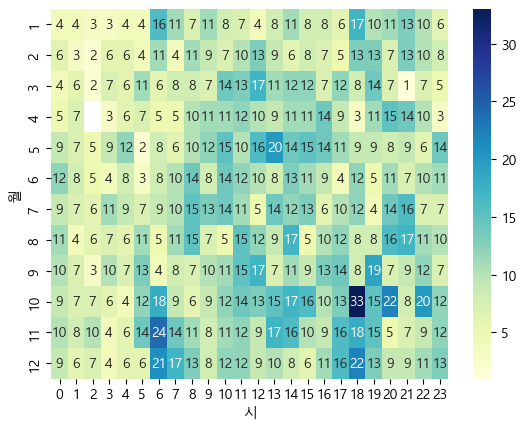

In [125]:
sns.heatmap(tab, cmap='YlGnBu', annot=True)

In [135]:
df_accident.columns

Index(['발생년', '발생년월일시', '주야', '요일', '사망자수', '부상자수', '중상자수', '경상자수', '부상신고자수',
       '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형', '가해자법규위반',
       '도로형태_대분류', '도로형태', '가해자_당사자종별', '피해자_당사자종별', '발생위치X(UTMK)',
       '발생위치Y(UTMK)', '경도', '위도', '월', '시'],
      dtype='object')

사망자수


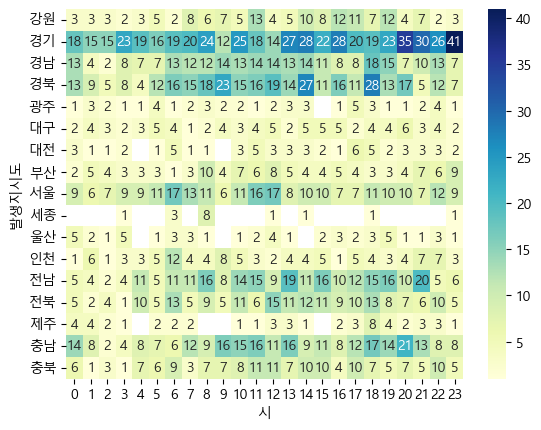

부상자수


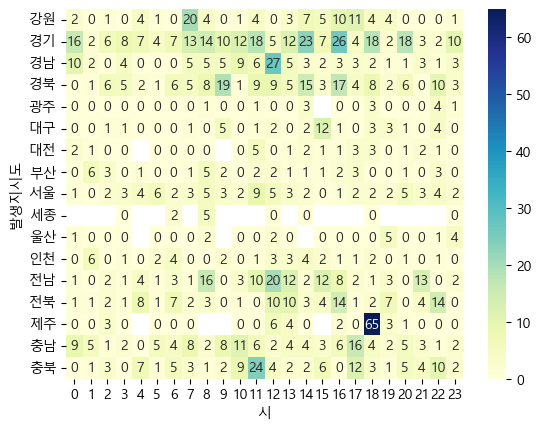

중상자수


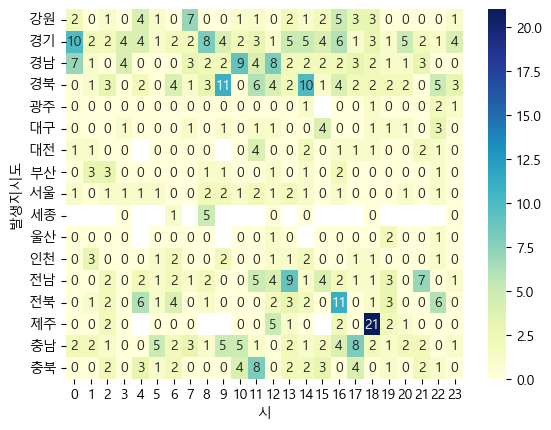

경상자수


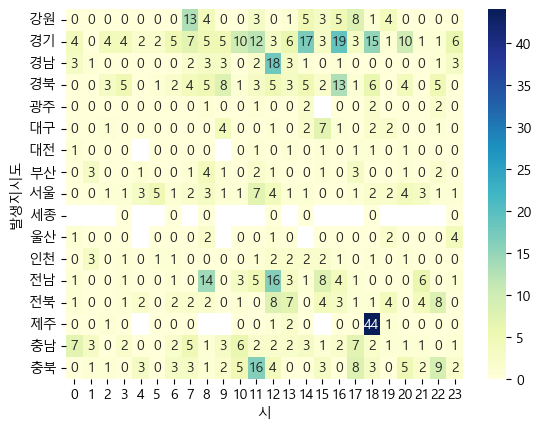

In [137]:
for col in ['사망자수', '부상자수', '중상자수', '경상자수']:
    print(col)
    tab = df_accident.pivot_table(index='발생지시도', columns='시', values=col, aggfunc='sum')
    sns.heatmap(tab, cmap='YlGnBu', annot=True)
    plt.show()

In [138]:
tab2 = pd.crosstab(df_accident['월'],df_accident['시'],margins=True)
tab2

시,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,All
월,,,,,,,,,,,,,,,,,,,,,
1,4,4,3,3,4,4,16,11,7,11,...,8,8,6,17,10,11,13,10,6,194
2,6,3,2,6,6,4,11,4,11,9,...,8,7,5,13,13,7,13,10,8,191
3,4,6,2,7,6,11,6,8,8,7,...,12,7,12,8,14,7,1,7,5,205
4,5,7,0,3,6,7,5,5,10,11,...,11,14,9,3,11,15,14,10,3,202
5,9,7,5,9,12,2,8,6,10,12,...,15,14,11,9,9,8,9,6,14,250
6,12,8,5,4,8,3,8,10,14,8,...,11,9,4,12,5,11,7,10,11,217
7,9,7,6,11,9,7,9,10,15,13,...,13,6,10,12,4,14,16,7,7,241
8,11,4,6,7,6,11,5,11,15,7,...,5,10,12,8,8,16,17,11,10,238
9,10,7,3,10,7,13,4,8,7,10,...,9,13,14,8,19,7,9,12,7,238


In [139]:
df_accident.pivot_table(index='월', columns='시', values='사망자수', aggfunc='mean')

시,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
월,,,,,,,,,,,,,,,,,,,,,
1,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000,1.000000,1.000000,1.000,...,1.090909,1.000000,1.125,1.0,1.000000,1.000000,1.000000,1.000000,1.100000,1.000000
2,1.000000,1.333333,1.0,1.166667,1.166667,1.000000,1.000,1.000000,1.636364,1.000,...,1.000000,1.000000,1.000,1.0,1.000000,1.000000,1.000000,1.153846,1.000000,1.000000
3,1.000000,1.000000,1.0,1.142857,1.000000,1.000000,1.000,1.000000,1.000000,1.000,...,1.000000,1.000000,1.000,1.0,1.000000,1.000000,1.000000,1.000000,1.285714,1.000000
4,1.800000,1.000000,NaN,1.000000,1.000000,1.000000,1.200,1.000000,1.000000,1.000,...,1.000000,1.000000,1.000,1.0,1.666667,1.000000,1.066667,1.071429,1.100000,1.000000
5,1.111111,1.000000,1.2,1.000000,1.000000,1.000000,1.000,1.000000,1.000000,1.000,...,1.000000,1.000000,1.000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
6,1.083333,1.000000,1.0,1.000000,1.500000,1.000000,1.125,1.000000,1.000000,1.000,...,1.000000,1.000000,1.000,1.0,1.000000,1.000000,1.090909,1.142857,1.000000,1.000000
7,1.000000,1.000000,1.0,1.090909,1.333333,1.000000,1.000,1.000000,1.266667,1.000,...,1.000000,1.000000,1.000,1.0,1.083333,1.000000,1.071429,1.000000,1.000000,1.000000
8,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000,1.000000,1.133333,1.000,...,1.000000,1.000000,1.100,1.0,1.000000,1.000000,1.125000,1.000000,1.090909,1.000000
9,1.000000,1.142857,1.0,1.100000,1.000000,1.000000,1.000,1.000000,1.000000,1.100,...,1.000000,1.000000,1.000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.142857


#### End of script